In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
sns.set_theme(style='whitegrid')

In [40]:
df = pd.read_csv('data_science_salaries.csv')
df.head()

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
0,Data Engineer,Mid-level,Full-time,Remote,2024,United States,148100,USD,148100,United States,Medium
1,Data Engineer,Mid-level,Full-time,Remote,2024,United States,98700,USD,98700,United States,Medium
2,Data Scientist,Senior-level,Full-time,Remote,2024,United States,140032,USD,140032,United States,Medium
3,Data Scientist,Senior-level,Full-time,Remote,2024,United States,100022,USD,100022,United States,Medium
4,BI Developer,Mid-level,Full-time,On-site,2024,United States,120000,USD,120000,United States,Medium


In [41]:
df.columns

Index(['job_title', 'experience_level', 'employment_type', 'work_models',
       'work_year', 'employee_residence', 'salary', 'salary_currency',
       'salary_in_usd', 'company_location', 'company_size'],
      dtype='object')

In [42]:
df.dtypes

job_title             object
experience_level      object
employment_type       object
work_models           object
work_year              int64
employee_residence    object
salary                 int64
salary_currency       object
salary_in_usd          int64
company_location      object
company_size          object
dtype: object

In [67]:
numberCols = df.select_dtypes(include='number').columns.to_list()
stringCols = df.select_dtypes(exclude='number').columns.to_list()

In [70]:
for cols in stringCols:
    print(cols)
    print(df[cols].unique())

job_title
['Data Engineer' 'Data Scientist' 'BI Developer' 'Research Analyst'
 'Business Intelligence Developer' 'Data Analyst'
 'Director of Data Science' 'MLOps Engineer' 'Machine Learning Scientist'
 'Machine Learning Engineer' 'Data Science Manager' 'Applied Scientist'
 'Business Intelligence Analyst' 'Analytics Engineer'
 'Business Intelligence Engineer' 'Data Science' 'Research Scientist'
 'Research Engineer' 'Managing Director Data Science' 'AI Engineer'
 'Data Specialist' 'Data Architect' 'Data Visualization Specialist'
 'ETL Developer' 'Data Science Practitioner' 'Computer Vision Engineer'
 'Data Lead' 'ML Engineer' 'Data Developer' 'Data Modeler'
 'Data Science Consultant' 'AI Architect' 'Data Analytics Manager'
 'Data Science Engineer' 'Data Product Manager' 'Data Quality Analyst'
 'Data Strategist' 'Prompt Engineer' 'Data Science Lead'
 'Business Intelligence Manager' 'Data Manager' 'Data Analytics Lead'
 'Machine Learning Infrastructure Engineer' 'Data Integration Engineer

# What is the work models in the data roles?

In [53]:
workModels = df['work_models'].value_counts()

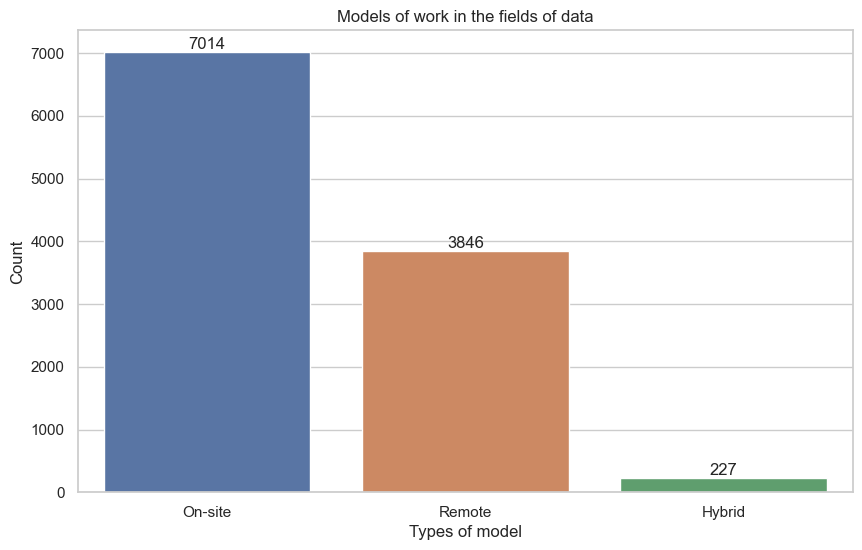

In [58]:
plt.figure(figsize=(10,6))
sns.barplot(x=workModels.index, y=workModels.values)
for i, val in enumerate(workModels.values):
    plt.text(i, val+i, str(val), ha='center', va='bottom')
plt.title('Models of work in the fields of data')
plt.xlabel('Types of model')
plt.ylabel('Count')
plt.show()

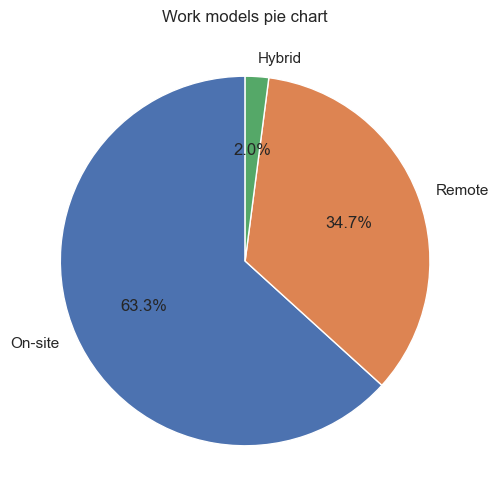

In [55]:
plt.figure(figsize=(10,6))
plt.pie(workModels.values, labels=workModels.index, autopct='%1.1f%%', startangle=90)
plt.title('Work models pie chart')
plt.show()

Based on the plot above, we can see that most of the workers work on-site than remote or hybrid. We can gain more insight if we know what's the type/size of the company that most of the remote workers work at. In addition, we can gain more insights about the industries if we know the value counts of each company sizes.

In [60]:
companySizes = df['company_size'].value_counts()

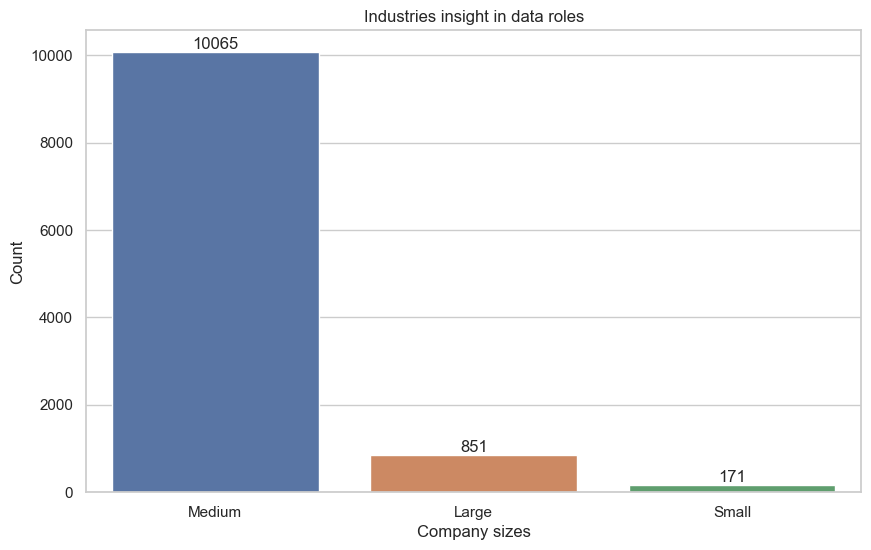

In [61]:
plt.figure(figsize=(10,6))
sns.barplot(x=companySizes.index, y=companySizes.values)
for i, val in enumerate(companySizes.values):
    plt.text(i, val+i, str(val), ha='center', va='bottom')
plt.title('Industries insight in data roles')
plt.xlabel('Company sizes')
plt.ylabel('Count')
plt.show()

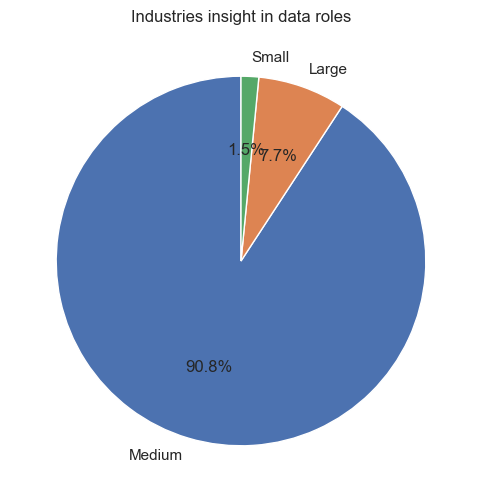

In [63]:
plt.figure(figsize=(10,6))
plt.pie(companySizes.values, labels=companySizes.index, autopct='%1.1f%%', startangle=90)
plt.title('Industries insight in data roles')
plt.show()

There're 3 company sizes based on the dataframe, let's merge that data to the work models to know what model for each company sizes.

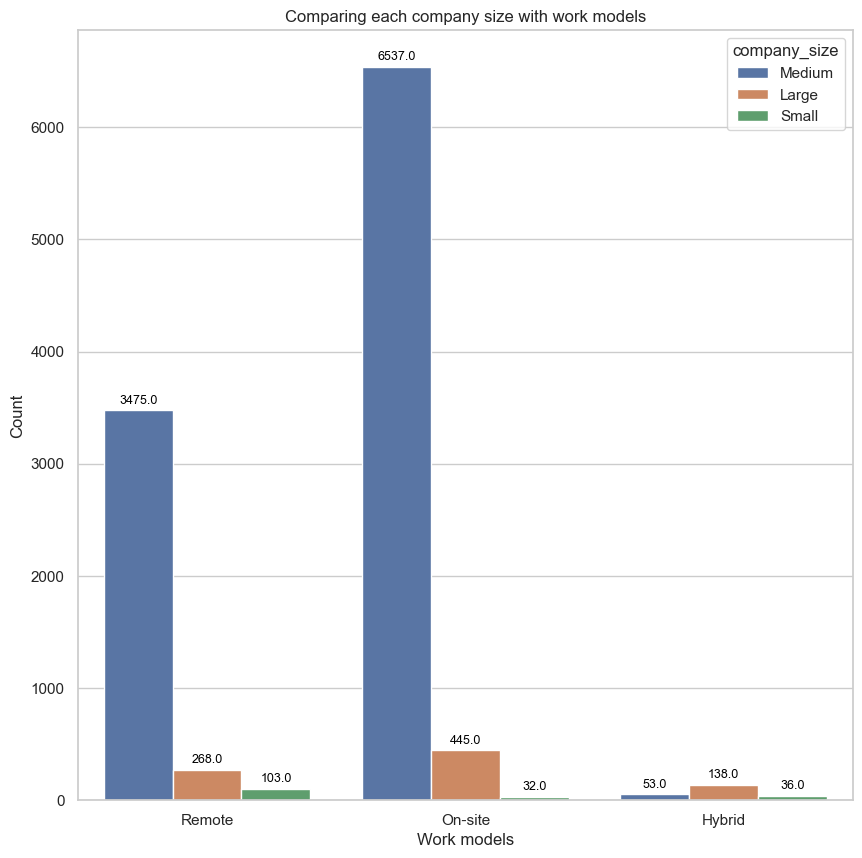

In [65]:
plt.figure(figsize=(10, 10))
ax = sns.countplot(x='work_models', hue='company_size', data=df)

# Add counts at the top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=9, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Comparing each company size with work models')
plt.xlabel('Work models')
plt.ylabel('Count')
plt.show()

based on the plot above, you can see that most of the workers work on-site than hybrid or remote

Based on the exploration above we can conclude several points below:
- Small companies tend to use remote work models than on-site
- Medium and large companies use all of the three work models (remote, on-site, and hybrid)
- Most of the medium and large companies use on-site work models however there're some companies that use remote or hybrid work models. However, hybrid work model is less used by companies.
- Almost all of the data roles works on Medium companies which is 90.8%

# In what country should i work if i want to achieve high salary?

To answer this question we need to know how much the total salaries from each countries in the data

In [97]:
salaryCountry = df.groupby('company_location')[['salary_in_usd']].mean().reset_index().set_index('company_location')

In [101]:
salaryCountry.rename(columns={'salary_in_usd' : 'avg_salary_in_usd'}, inplace=True)

In [104]:
salaryCountry.loc[['United States']]

,avg_salary_in_usd
company_location,
United States,157717.065062
